In [1]:
from mip import *
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

# Model_S_diff r

# Parameter

In [24]:
N = 3
T = 10
set_N = set(range(N))
set_T = set(range(T))
d_s = [5000/(1+50*np.exp(-0.1*(t+1))) for t in set_T]
d_m = [279/(1+2.2*np.exp(-0.33*(t+1))) for t in set_T]
d_f = [258/(1+3.4*np.exp(-0.9*(t+1))) for t in set_T]
h = [3,2.5,2]
mu = [5,5,5]
r = 0
s = [50,50,50]
Pmax = [10,10,10]
delta = [5,5,5]
alpha = 2
M = 1000000
tau = []
for i in range(0,150):
    tau.append(i*0.01)
tau.remove(0.0)
g_list = []
for j in range(len(tau)):
    g = [[Pmax[i] - delta[i]*np.exp(-(t+1)/tau[j]) for t in set_T] for i in set_N]
    g_list.append(g)

In [3]:
np.array(g_list).shape

(149, 3, 10)

In [4]:
d = d_s

In [5]:
m_s = Model()
l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
#w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
+ r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))


In [ ]:
obj_list_s=[]
m_s = Model()
l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
#w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
+ r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))

for j in range(len(g_list)):
    l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
    p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
    #w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
    w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
    z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
    y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
    y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
    y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

    m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
    + r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))
    
    #2
    for t in set_T:
            m_s += l[0][t] == xsum(p[0][t_p] - d[t_p] for t_p in range(t+1))

    #3
    for (i,t) in product(set_N-{0}, set_T):
            m_s += l[i][t] == xsum(p[i][t_p] - p[i-1][t_p] for t_p in range(t+1))

    #4
    for (i,t) in product(set_N,set_T):
            m_s += p[i][t] == xsum(w[i][t_p][t]*g_list[j][i][t-t_p] for t_p in range(t+1) )

    #5
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += w[i][t_p][t] - w[i][t_p][t+1] <= y[i][t+1]*M

    #6
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += w[i][t_p][t+1] - w[i][t_p][t] <= y[i][t+1]*M

    #7
    for (i,t) in product(set_N,set_T):
        #if y_a+y_w == 2:
            #alpha = 2
        #else: 
            #alpha = 1
        m_s += y_a[i][t] + y_w[i][t] <= alpha*y[i][t]

    #8
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += z[i][t_p][t+1] == w[i][t_p][t] - w[i][t_p][t+1]

    #9
    for (i,t) in product(set_N,set_T):
        m_s += w[i][t][t] <= y_a[i][t]*M

    #10
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += z[i][t_p][t] <= y_w[i][t]*M

    #11
    for (i,t_p,t) in product(set_N,range(t+1),set_T):
         m_s += z[i][t_p][t] >= 0


    #12
    for (i,t) in product (set_N,set_T):
        m_s += l[i][t] >= 0

    #13
    for (i,t_p,t) in product(set_N,range(t+1),set_T):
         m_s += w[i][t_p][t] >= 0 
        
    m_s.optimize()
    obj_list_s.append(m_s.objective_value)
    m_s = Model()
    


with open('tau-TRC_r0.txt','w',encoding='UTF-8') as f:
    for i in obj_list_s:
        f.write(str(i)+'\n')
f.close()

### 저장된 TRC값 불러오기

In [25]:
obj_list_s = []
f = open('tau-TRC_r0.txt','r')
linelist = f.readlines()
for line in linelist:
    line = float(line.rstrip())
    obj_list_s.append(line)
f.close()

In [26]:
obj_list_s

[3434.0123697953227,
 3434.0123697953227,
 3434.0123697953254,
 3434.012369793657,
 3434.012369547845,
 3434.012362858061,
 3434.0122947675336,
 3434.0119223734287,
 3434.0092350037385,
 3434.0028471606884,
 3433.9887359691675,
 3433.961979717111,
 3433.916711552547,
 3433.846741397438,
 3433.745906918055,
 3433.6085614044105,
 3433.42986980479,
 3433.2060041720238,
 3432.9342367568747,
 3432.6129510829364,
 3432.241592973202,
 3431.8205815191304,
 3431.35119652871,
 3430.835455173164,
 3430.275987050995,
 3429.675913933245,
 3429.0387381354035,
 3428.368241716694,
 3427.668397457111,
 3426.943291704939,
 3426.197058631814,
 3425.433825093647,
 3424.6576651227756,
 3423.872563002705,
 3423.082383882534,
 3422.290850932511,
 3421.5015281180067,
 3420.717807750167,
 3419.9429020662164,
 3419.179838177248,
 3418.4314558058622,
 3417.700407313286,
 3416.98915958523,
 3416.2999974071886,
 3415.6350280156616,
 3414.9961865591977,
 3414.3852422447294,
 3413.8038049815655,
 3413.2533323657262,

# r=1

In [8]:
r = 1

obj_list_s_r1=[]

m_s = Model()
l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
#w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
+ r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))

for j in range(len(g_list)):
    l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
    p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
    #w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
    w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
    z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
    y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
    y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
    y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

    m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
    + r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))
    
    #2
    for t in set_T:
            m_s += l[0][t] == xsum(p[0][t_p] - d[t_p] for t_p in range(t+1))

    #3
    for (i,t) in product(set_N-{0}, set_T):
            m_s += l[i][t] == xsum(p[i][t_p] - p[i-1][t_p] for t_p in range(t+1))

    #4
    for (i,t) in product(set_N,set_T):
            m_s += p[i][t] == xsum(w[i][t_p][t]*g_list[j][i][t-t_p] for t_p in range(t+1) )

    #5
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += w[i][t_p][t] - w[i][t_p][t+1] <= y[i][t+1]*M

    #6
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += w[i][t_p][t+1] - w[i][t_p][t] <= y[i][t+1]*M

    #7
    for (i,t) in product(set_N,set_T):
        #if y_a+y_w == 2:
            #alpha = 2
        #else: 
            #alpha = 1
        m_s += y_a[i][t] + y_w[i][t] <= alpha*y[i][t]

    #8
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += z[i][t_p][t+1] == w[i][t_p][t] - w[i][t_p][t+1]

    #9
    for (i,t) in product(set_N,set_T):
        m_s += w[i][t][t] <= y_a[i][t]*M

    #10
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += z[i][t_p][t] <= y_w[i][t]*M

    #11
    for (i,t_p,t) in product(set_N,range(t+1),set_T):
         m_s += z[i][t_p][t] >= 0


    #12
    for (i,t) in product (set_N,set_T):
        m_s += l[i][t] >= 0

    #13
    for (i,t_p,t) in product(set_N,range(t+1),set_T):
         m_s += w[i][t_p][t] >= 0 
        
    m_s.optimize()
    obj_list_s_r1.append(m_s.objective_value)
    m_s = Model()
    


with open('tau-TRC_r1.txt','w',encoding='UTF-8') as f2:
    for i in obj_list_s_r1:
        f2.write(str(i)+'\n')
f2.close()

In [27]:
obj_list_s_r1 = []
f = open('tau-TRC_r1.txt','r')
linelist = f.readlines()
for line in linelist:
    line = float(line.rstrip())
    obj_list_s_r1.append(line)
f.close()

In [28]:
obj_list_s_r1

[3434.0123697953222,
 3434.0123697953222,
 3434.0123697953245,
 3434.012369793659,
 3434.012369547847,
 3434.0123628580627,
 3434.012294767533,
 3434.011922344519,
 3434.0105753833036,
 3434.0069191903663,
 3433.9988428899255,
 3433.9835230638664,
 3433.957630457061,
 3433.9176093762517,
 3433.8599624006088,
 3433.781494919499,
 3433.679497608902,
 3433.5518626631915,
 3433.3971401802264,
 3433.2145459914636,
 3433.0039334037883,
 3432.7657404195697,
 3432.500922156922,
 3432.210876089254,
 3431.897365732548,
 3431.562446699762,
 3431.208397665156,
 3430.837657726013,
 3430.452770874008,
 3430.0563377427225,
 3429.650974432088,
 3429.239277980243,
 3428.823797922266,
 3428.407013314114,
 3427.9913145866753,
 3427.578989612561,
 3427.1722134049874,
 3426.773040915435,
 3426.3834024486814,
 3426.0051012666568,
 3425.6398130037696,
 3425.289086564247,
 3424.954346216288,
 3424.636894637643,
 3424.337916702806,
 3424.058483833649,
 3423.7995587627997,
 3423.5620005834285,
 3423.34656997989

# r=0.1

In [11]:
r = 0.1

obj_list_s_r01=[]

m_s = Model()
l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
#w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
+ r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))

for j in range(len(g_list)):
    l = [[m_s.add_var(name='l({},{})'.format(i,t)) for t in set_T] for i in set_N]
    p = [[m_s.add_var(name='p({},{})'.format(i,t)) for t in set_T] for i in set_N]
    #w = [[[m.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in T if t>=t_p]  for t_p in T] for i in N]
    w = [[[m_s.add_var(name='w({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
    z = [[[m_s.add_var(name='z({},{},{})'.format(i,t_p,t)) for t in set_T ]  for t_p in set_T] for i in set_N]
    y = [[m_s.add_var(name='y({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
    y_a = [[m_s.add_var(name='y_a({},{})'.format(i,t), var_type=BINARY) for t in set_T] for i in set_N]
    y_w = [[m_s.add_var(name='y_w({},{})'.format(i,t),var_type=BINARY) for t in set_T] for i in set_N]

    m_s.objective = minimize(xsum(s[i]*y[i][t] + h[i]*l[i][t] + mu[i]*xsum(w[i][t_p][t] for t_p in range(t+1)) for i in set_N  for t in set_T)
    + r*xsum(z[i][t_p][t+1] for i in set_N for t in (set_T-{9}) for t_p in range(t+1)))
    
    #2
    for t in set_T:
            m_s += l[0][t] == xsum(p[0][t_p] - d[t_p] for t_p in range(t+1))

    #3
    for (i,t) in product(set_N-{0}, set_T):
            m_s += l[i][t] == xsum(p[i][t_p] - p[i-1][t_p] for t_p in range(t+1))

    #4
    for (i,t) in product(set_N,set_T):
            m_s += p[i][t] == xsum(w[i][t_p][t]*g_list[j][i][t-t_p] for t_p in range(t+1) )

    #5
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += w[i][t_p][t] - w[i][t_p][t+1] <= y[i][t+1]*M

    #6
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += w[i][t_p][t+1] - w[i][t_p][t] <= y[i][t+1]*M

    #7
    for (i,t) in product(set_N,set_T):
        #if y_a+y_w == 2:
            #alpha = 2
        #else: 
            #alpha = 1
        m_s += y_a[i][t] + y_w[i][t] <= alpha*y[i][t]

    #8
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += z[i][t_p][t+1] == w[i][t_p][t] - w[i][t_p][t+1]

    #9
    for (i,t) in product(set_N,set_T):
        m_s += w[i][t][t] <= y_a[i][t]*M

    #10
    for (i,t_p,t) in product(set_N,range(t+1),set_T-{9}):
        m_s += z[i][t_p][t] <= y_w[i][t]*M

    #11
    for (i,t_p,t) in product(set_N,range(t+1),set_T):
         m_s += z[i][t_p][t] >= 0


    #12
    for (i,t) in product (set_N,set_T):
        m_s += l[i][t] >= 0

    #13
    for (i,t_p,t) in product(set_N,range(t+1),set_T):
         m_s += w[i][t_p][t] >= 0 
        
    m_s.optimize()
    obj_list_s_r01.append(m_s.objective_value)
    m_s = Model()
    


with open('tau-TRC_r01.txt','w',encoding='UTF-8') as f3:
    for i in obj_list_s_r01:
        f3.write(str(i)+'\n')
f3.close()

In [29]:
obj_list_s_r01 = []
f = open('tau-TRC_r01.txt','r')
linelist = f.readlines()
for line in linelist:
    line = float(line.rstrip())
    obj_list_s_r01.append(line)
f.close()

In [30]:
obj_list_s_r01

[3434.0123697953222,
 3434.0123697953222,
 3434.0123697953245,
 3434.012369793659,
 3434.012369547847,
 3434.0123628580627,
 3434.012294767533,
 3434.011922344519,
 3434.0105753833036,
 3434.0069191903663,
 3433.9988428899255,
 3433.9835230638664,
 3433.957630457061,
 3433.9176093762517,
 3433.8599624006088,
 3433.781494919499,
 3433.679497608902,
 3433.5518626631915,
 3433.3971401802264,
 3433.2145459914636,
 3433.0039334037883,
 3432.7657404195697,
 3432.500922156922,
 3432.210876089254,
 3431.897365732548,
 3431.562446699762,
 3431.208397665156,
 3430.837657726013,
 3430.452770874008,
 3430.0563377427225,
 3429.650974432088,
 3429.049439273582,
 3428.2761931031077,
 3427.4941300380256,
 3426.70711055503,
 3425.9188532379594,
 3425.13291757375,
 3424.352691520283,
 3423.58138309686,
 3422.8220153384314,
 3422.077424036252,
 3421.3502577657005,
 3420.642979770389,
 3419.957871334748,
 3419.2970363314475,
 3418.662406677635,
 3418.0557484764213,
 3417.4786686555713,
 3416.9326219463787

# tau_TRC plot

In [31]:
np.array(tau).shape

(149,)

In [32]:
tau

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41000000000000003,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47000000000000003,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.5700000000000001,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.6900000000000001,
 0.7000000000000001,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.8200000000000001,
 0.8300000000000001,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.9400000000000001,
 0.9500000000000001,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.1300000000000001,
 1.1400000000000001,
 1.1500000000000001,
 1.16,
 1.17,
 1.18,

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

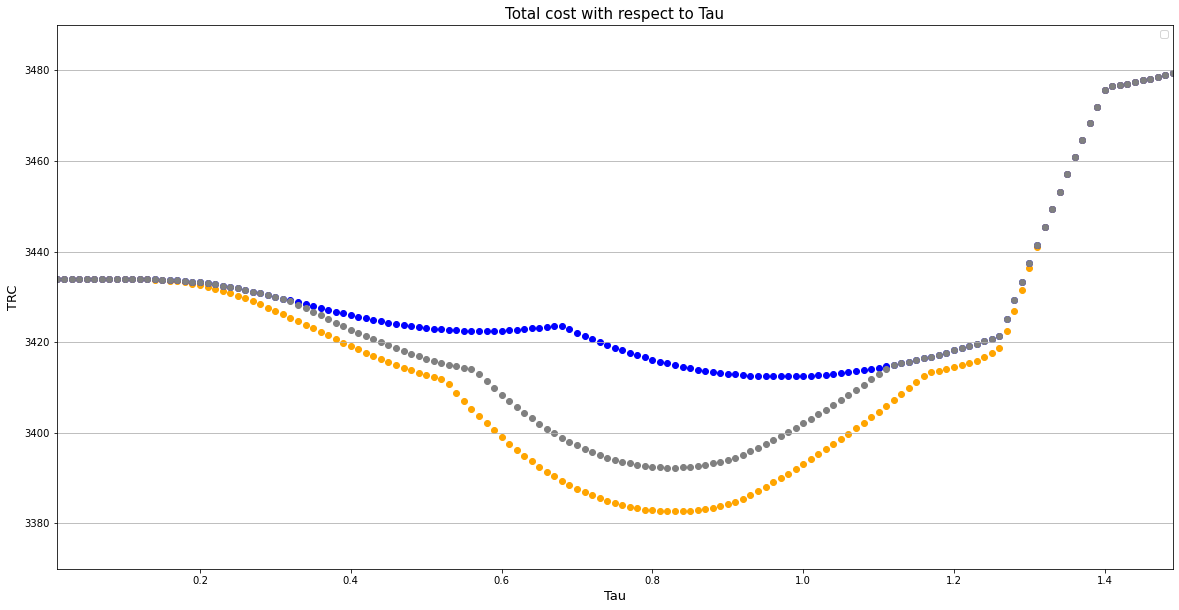

In [35]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.set_xlabel('Tau',fontsize=13)
plt.xlim(0.01,1.49)
plt.ylim(3370,3490)
ax.set_ylabel('TRC',fontsize=13)
ax.set_title('Total cost with respect to Tau', fontsize=15)
ax.legend()
ax.grid(axis='y')
plt.gcf().set_size_inches(20, 10)
plt.scatter(tau, obj_list_s, color='orange')
plt.scatter(tau, obj_list_s_r1, color='blue')
plt.scatter(tau, obj_list_s_r01, color='grey')
